In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv(
    'https://labfile.oss.aliyuncs.com/courses/1363/HousePrice.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')

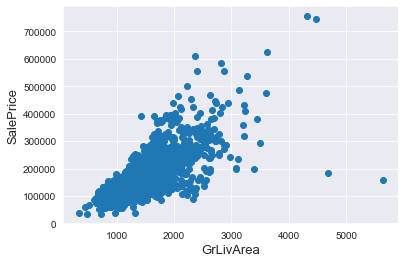

In [3]:
fig, ax = plt.subplots()
# 绘制散点图
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

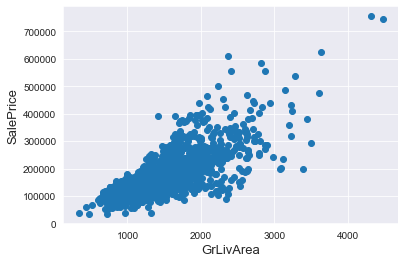

In [4]:
# 删除异常值点
train_drop = train.drop(
    train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

# 重新绘制图
fig, ax = plt.subplots()
ax.scatter(train_drop['GrLivArea'], train_drop['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

(-0.5, 9.5, 0.0, 800000.0)

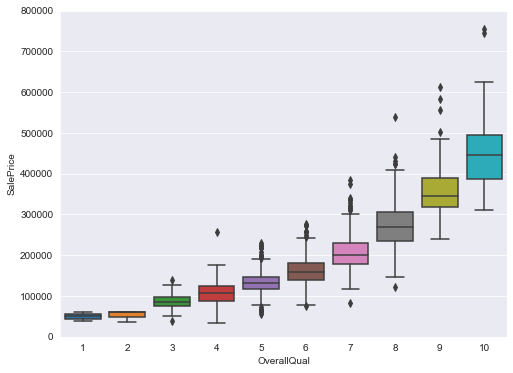

In [5]:
var = 'OverallQual'
data = pd.concat([train_drop['SalePrice'], train_drop[var]], axis=1)
# 画出箱线图
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

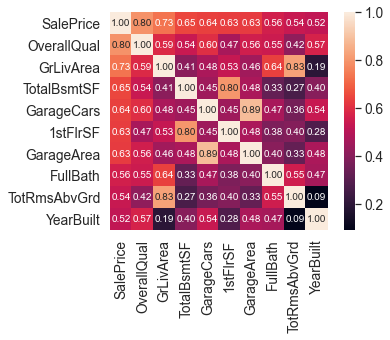

In [6]:
import numpy as np

k = 10
corrmat = train_drop.corr()  # 获得相关性矩阵
# 获得相关性最高的 K 个特征
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# 获得相关性最高的 K 个特征组成的子数据集
cm = np.corrcoef(train_drop[cols].values.T)
# 绘制热图
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
                 'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


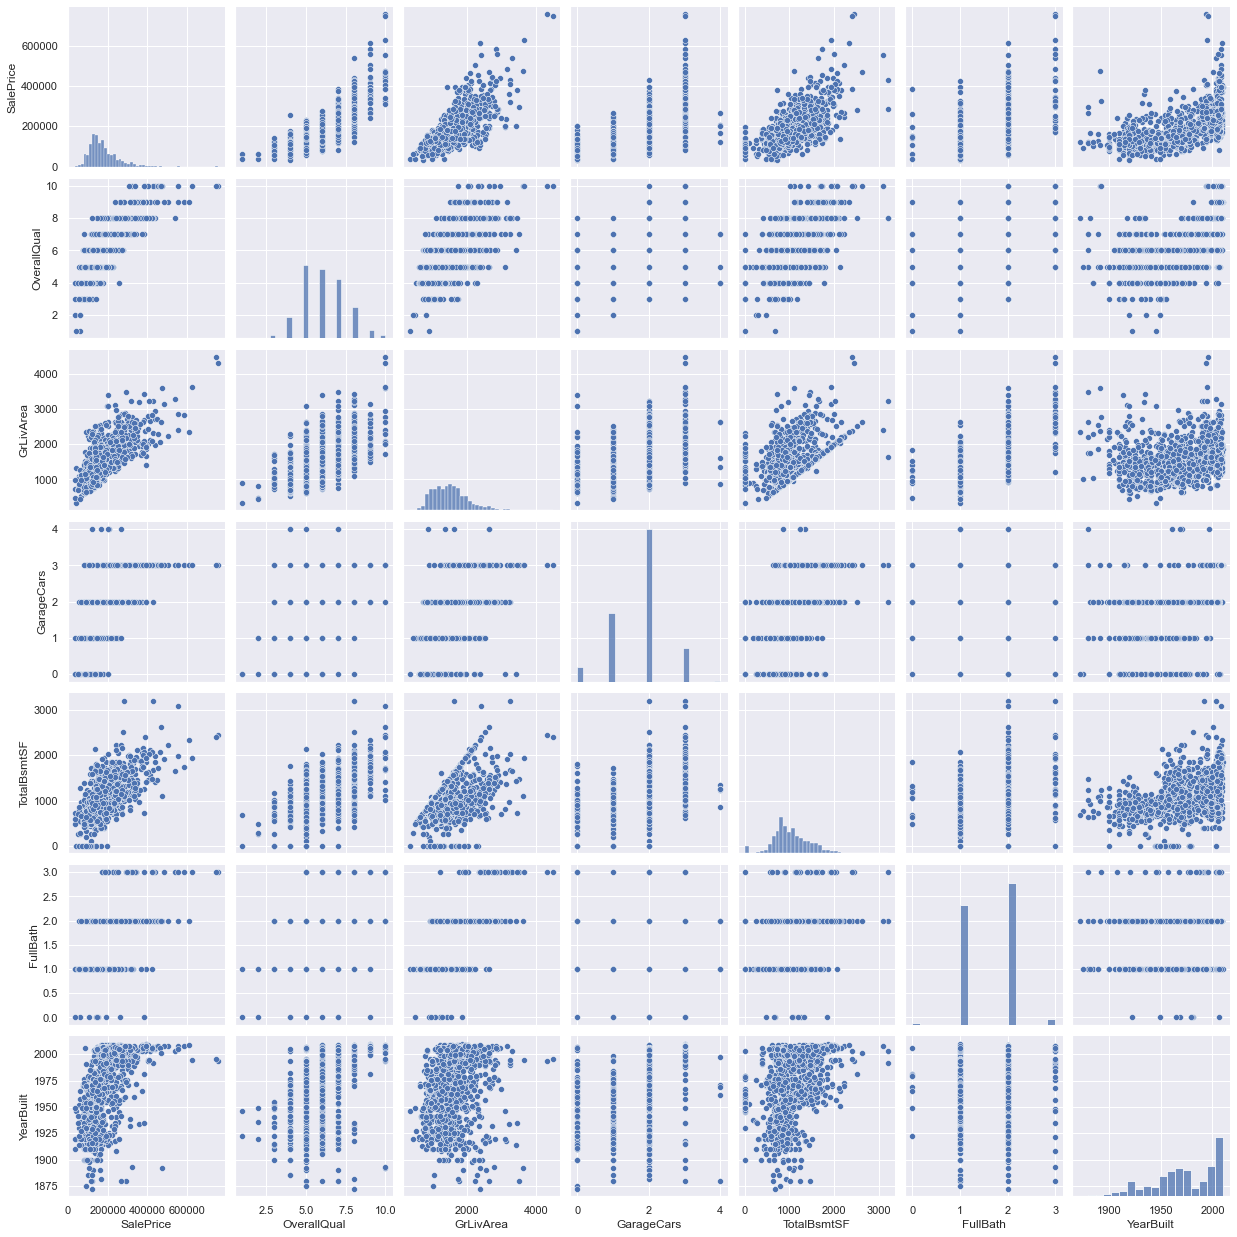

In [7]:
# 绘制散点图
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea',
        'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_drop[cols], size=2.5)
plt.show()

### 数据预处理


In [8]:
train_drop1 = train_drop.drop("Id", axis=1)
train_drop1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train_drop1['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180932.92 and sigma = 79467.79



Text(0.5, 1.0, 'SalePrice distribution')

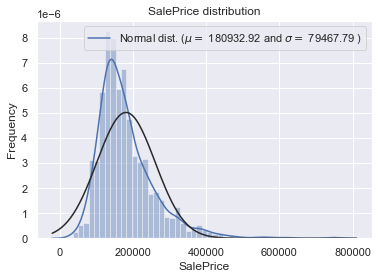

In [10]:
from scipy.stats import norm, skew

sns.distplot(train_drop1['SalePrice'], fit=norm)

# 获得均值和方差
(mu, sigma) = norm.fit(train_drop1['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 画出数据分布图
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
# 设置标题
plt.title('SalePrice distribution')

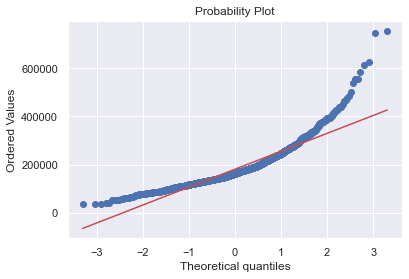

In [11]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(train_drop1['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



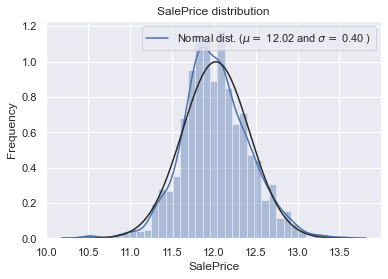

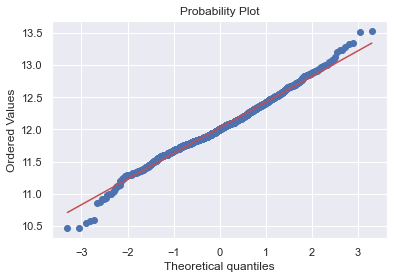

In [12]:
# 平滑数据
train_drop1["SalePrice"] = np.log1p(train_drop1["SalePrice"])

# 重新画出数据分布图
sns.distplot(train_drop1['SalePrice'], fit=norm)

# 重新计算平滑后的均值和方差
(mu, sigma) = norm.fit(train_drop1['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# 画出 Q-Q 图

fig = plt.figure()
res = stats.probplot(train_drop1['SalePrice'], plot=plt)
plt.show()

In [13]:
train_drop1.isnull().sum().sort_values(ascending=False)[:20]  # 取前 20 个数据

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [14]:
train_na = (train_drop1.isnull().sum() / len(train)) * 100
train_na = train_na.drop(
    train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': train_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.452055
MiscFeature,96.164384
Alley,93.630137
Fence,80.616438
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

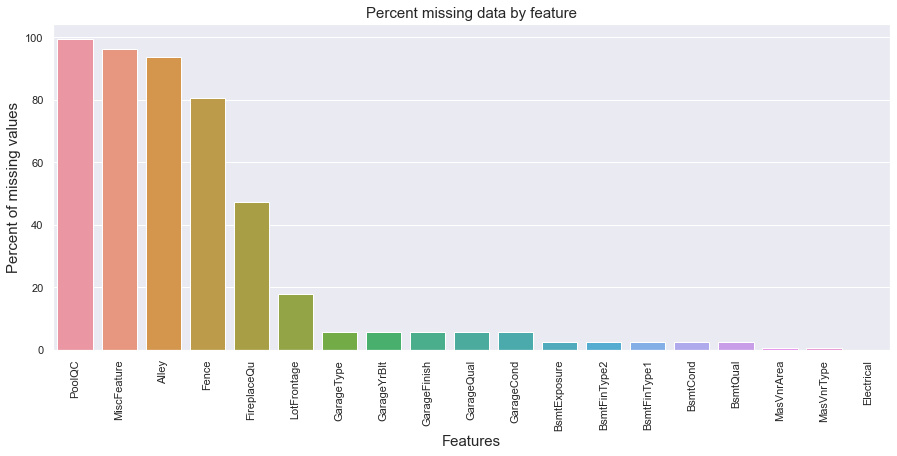

In [15]:
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [16]:
feature = ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
           'FireplaceQu', 'GarageType', 'GarageFinish',
           'GarageQual', 'GarageCond', 'BsmtQual',
           'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
           'BsmtFinType2', 'MasVnrType', 'MSSubClass']
for col in feature:
    train_drop1[col] = train_drop1[col].fillna('None')

In [17]:
feature = ['GarageYrBlt', 'GarageArea', 'GarageCars',
           'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
           'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
           'MasVnrArea', 'Electrical']
for col in feature:
    train_drop1[col] = train_drop1[col].fillna(0)

In [18]:
train_drop1["LotFrontage"] = train_drop1.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [19]:
feature = []
train_drop1['MSZoning'] = train_drop1['MSZoning'].fillna(
    train_drop1['MSZoning'].mode()[0])

In [22]:
train_drop1["Functional"] = train_drop1["Functional"].fillna("Typ")

train_drop2 = train_drop1.drop(['Utilities'], axis=1)

In [23]:
train_drop2.isnull().sum().sort_values(ascending=False)[:20]

MSSubClass      0
KitchenAbvGr    0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
BedroomAbvGr    0
GarageCars      0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
GarageFinish    0
GarageArea      0
dtype: int64

In [24]:
feature = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
for col in feature:
    train_drop2[col] = train_drop2[col].apply(str)

In [25]:
from sklearn.preprocessing import LabelEncoder

cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold']
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(train_drop2[c].values))
    train_drop2[c] = lbl.transform(list(train_drop2[c].values))
train_drop2[cols].head()

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,3,2,4,5,5,2,4,0,3,2,...,0,3,2,1,1,1,9,4,2,4
1,5,2,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,4,7,1,7
2,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,9,4,2,11
3,2,4,1,5,5,3,4,2,3,2,...,0,0,2,1,1,1,10,4,0,4
4,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,9,4,2,3


In [26]:
train_drop2['TotalSF'] = train_drop2['TotalBsmtSF'] + \
    train_drop2['1stFlrSF'] + train_drop2['2ndFlrSF']

In [27]:
numeric_feats = train_drop2.dtypes[train_drop2.dtypes != "object"].index

# 检测特征值
skewed_feats = train_drop2[numeric_feats].apply(
    lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
LandSlope,4.805032
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895


In [28]:
from scipy.special import boxcox1p
skewness = skewness[abs(skewness) > 0.75]


skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train_drop2[feat] = boxcox1p(train_drop2[feat], lam)

In [29]:
data_y = train_drop2['SalePrice']
data_X = train_drop2.drop(['SalePrice'], axis=1)

In [30]:
data_X_oh = pd.get_dummies(data_X)
print(data_X_oh.shape)

(1458, 221)


In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [32]:
data_y_v = data_y.values  # 转换为 NumPy 数组
data_X_v = data_X_oh.values
length = int(len(data_y)*0.7)

# 划分数据集
train_y = data_y_v[:length]
train_X = data_X_v[:length]
test_y = data_y_v[length:]
test_X = data_X_v[length:]

In [33]:
model = Lasso()
model.fit(train_X, train_y)

Lasso()

In [34]:
y_pred = model.predict(test_X)
mean_squared_error(test_y, y_pred)

0.0018862935394760103